## Univariate Selection : Using SelectKBest ##

Here we are taking example of cellphone market analysis data, Output feature is price and input features are phone specifications

In [1]:
import pandas as pd
import numpy as np
import os

In [2]:
data=pd.read_csv('Datasets/Feature selection.csv')

In [3]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,...,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,...,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,...,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,...,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,...,1137,1224,513,19,10,12,1,0,0,0


In [4]:
X=data.iloc[:,1:20]
Y=data.iloc[:,-1]

In [5]:
Y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

In [6]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [7]:
Bestfeature=SelectKBest(score_func=chi2, k=10)
fit=Bestfeature.fit(X,Y)

In [8]:
Score=pd.DataFrame(fit.scores_)
Column=pd.DataFrame(X.columns)

In [9]:
Final=pd.concat([Column,Score], axis=1)

In [10]:
Final.columns=['Specs','Score']

In [11]:
Final

,Specs,Score
0,blue,0.723232
1,clock_speed,0.648366
2,dual_sim,0.631011
3,fc,10.135166
4,four_g,1.521572
5,int_memory,89.839124
6,m_dep,0.745820
7,mobile_wt,95.972863
8,n_cores,9.097556
9,pc,9.186054


In [12]:
Univariate_Selection = Final.nlargest(10,'Score')
print(Univariate_Selection)

         Specs          Score
12         ram  931267.519053
10   px_height   17363.569536
11    px_width    9810.586750
7    mobile_wt      95.972863
5   int_memory      89.839124
14        sc_w      16.480319
15   talk_time      13.236400
3           fc      10.135166
13        sc_h       9.614878
9           pc       9.186054


As per the output we can see ram is a factor that affects the price of the phone

## Feature Selection : Using ExtraTreesclassifier##

In [13]:
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt

In [16]:
Model=ExtraTreesClassifier()
Model.fit(X,Y)

ExtraTreesClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                     criterion='gini', max_depth=None, max_features='auto',
                     max_leaf_nodes=None, max_samples=None,
                     min_impurity_decrease=0.0, min_impurity_split=None,
                     min_samples_leaf=1, min_samples_split=2,
                     min_weight_fraction_leaf=0.0, n_estimators=100,
                     n_jobs=None, oob_score=False, random_state=None, verbose=0,
                     warm_start=False)

In [17]:
print(Model.feature_importances_)

[0.02229487 0.03927899 0.02216913 0.03736388 0.01837262 0.04102237
 0.03868741 0.04116844 0.03790556 0.03864894 0.0518743  0.05312896
 0.38484501 0.03921394 0.03988004 0.03895652 0.01464274 0.01873443
 0.02181184]


Visualization of feature importance data 

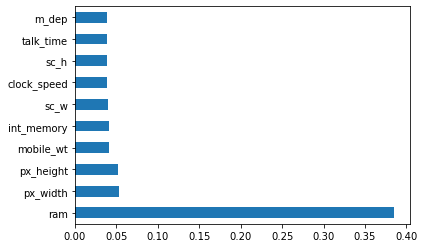

In [20]:
Fe_im=pd.Series(Model.feature_importances_,index=X.columns)
Fe_im.nlargest(10).plot(kind='barh')
plt.show()

## Using Correlation Matrix with Heatmap ##

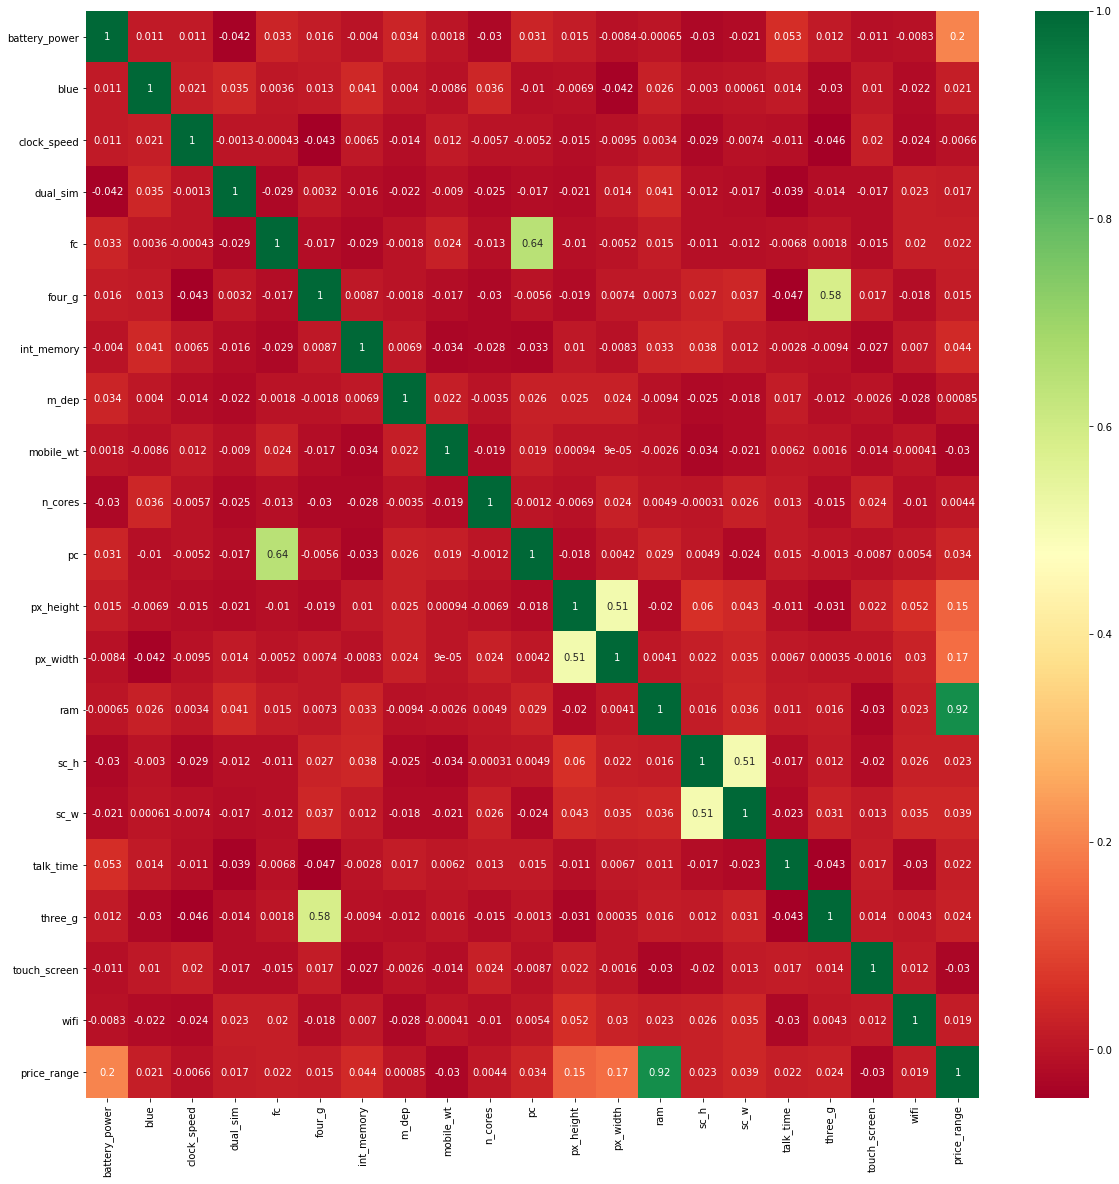

In [47]:
import seaborn as sns
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')
plt.show()

## In all the 3 methods we can see that ram is the most important feature affecting price##